In [13]:
### BB84 QKD Protocol, with 70% Depolarization Noise ###
### Implementation by Ajanta Das, 20-07-2023 ###

import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import AerSimulator

# Loading your IBM Quantum account(s)
#provider = IBMQ.load_account()

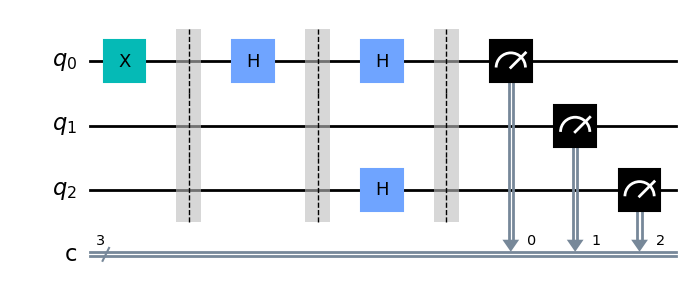

In [14]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

# Make a circuit
circ = QuantumCircuit(3, 3)
circ.x(0)
#circ.x(3)
circ.barrier()

#Alice basis
circ.h(0)

#circ.h(3)
circ.barrier()
#Bob's basis
circ.h(0) 
circ.h(2)
#circ.h(3)
circ.barrier()
#circ.measure([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])
circ.measure([0, 1, 2], [0, 1, 2])
circ.draw()

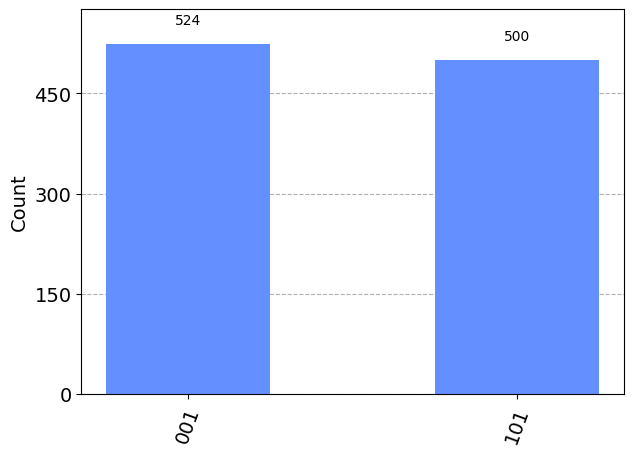

In [15]:
backend=AerSimulator(method='density_matrix') #simulation is done in density matrix
job=execute(circ,backend,shots=1024)
result=job.result()
count=result.get_counts(circ)
plot_histogram(count)

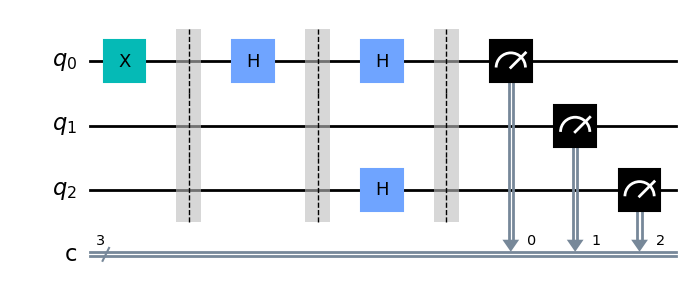

In [16]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import qiskit.providers.aer.noise as noise
noise_model=noise.NoiseModel()
# Error probabilities
prob_1 = 0.7  #70% noise applied

# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1) #depolarization noise used


# Make a circuit
circ = QuantumCircuit(3, 3)
circ.x(0)

#cir.x(3)
circ.barrier()

#Alice basis
circ.h(0)
#cir.h(3)
circ.barrier()
#Bob's basis
circ.h(0)
circ.h(2)
#cir.h(3)
circ.barrier()


noise_model.add_all_qubit_quantum_error(error_1, ['x', 'h'])

# Get basis gates from noise model


#cir.measure([0, 1, 2, 3,4], [0, 1, 2, 3,4])
circ.measure([0, 1, 2], [0, 1, 2])
circ.draw()


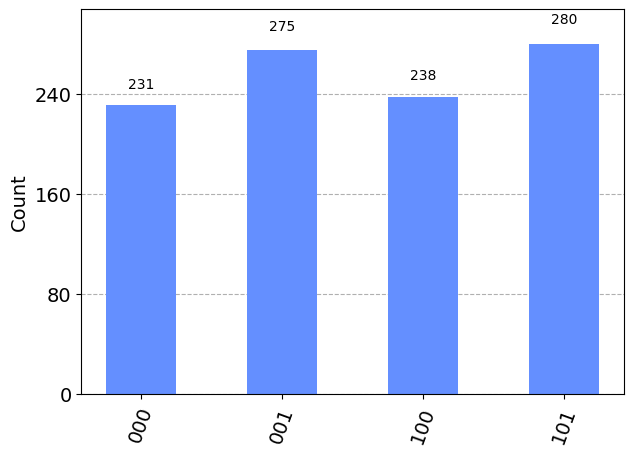

In [17]:
backend=AerSimulator(method='density_matrix',noise_model=noise_model) # simulation of noise in density matrix
job=execute(circ,backend,shots=1024)
result=job.result()
count=result.get_counts(circ)
plot_histogram(count)